In [13]:
import xarray as xr
import os
import pandas as pd

def read_rainfall(file):
    ds = xr.open_dataset(file, decode_times=True)
    return ds

def read_rainfall_files(files):
    datasets = []
    for file in files:
        ds = read_rainfall(file)
        datasets.append(ds)

    return datasets

def get_rainfall_feature(dir: str):
    files = [dir+'/'+f for f in os.listdir(dir) if f.endswith('.nc4')]
    datasets = read_rainfall_files(files)

    #combine them
    combined = xr.concat(datasets, dim='time')

    return combined

def convert_to_pd_dataframe(ds):
    df = ds.to_dataframe()

    return df

dir = '../dataset/rainfall/downloaded_files'
ds = get_rainfall_feature(dir)
datetimeindex = ds.indexes['time'].to_datetimeindex()
ds['time'] = datetimeindex
df = convert_to_pd_dataframe(ds).reset_index()

C:\Users\mathe\AppData\Local\Temp\ipykernel_1428\4080180970.py:33: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = ds.indexes['time'].to_datetimeindex()


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225280 entries, 0 to 2225279
Data columns (total 12 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   time                            datetime64[ns]
 1   lon                             float32       
 2   lat                             float32       
 3   latv                            int32         
 4   nv                              int32         
 5   lonv                            int32         
 6   precipitationQualityIndex       float32       
 7   lat_bnds                        float32       
 8   precipitation                   float32       
 9   probabilityLiquidPrecipitation  float32       
 10  time_bnds                       object        
 11  lon_bnds                        float32       
dtypes: datetime64[ns](1), float32(7), int32(3), object(1)
memory usage: 118.8+ MB


In [3]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
time,2225280,2013-12-28 14:39:09.473683968,2010-01-01 00:00:00,2012-01-01 00:00:00,2014-01-01 00:00:00,2016-01-01 00:00:00,2017-12-01 00:00:00,NaN
lon,2225280.0,71.549995,68.549995,70.049995,71.549995,73.049995,74.549995,1.760682
lat,2225280.0,22.399967,20.049999,21.225,22.4,23.574999,24.75,1.38534
latv,2225280.0,0.5,0.0,0.0,0.5,1.0,1.0,0.5
nv,2225280.0,0.5,0.0,0.0,0.5,1.0,1.0,0.5
lonv,2225280.0,0.5,0.0,0.0,0.5,1.0,1.0,0.5
precipitationQualityIndex,2225280.0,6.30966,1.96,4.32,5.76,7.45,22.769999,3.094048
lat_bnds,2225280.0,22.399967,20.0,21.2,22.4,23.599999,24.799999,1.386242
precipitation,2225280.0,0.096368,0.0,0.0,0.003,0.109,1.549,0.179338
probabilityLiquidPrecipitation,2225280.0,99.999969,99.0,100.0,100.0,100.0,100.0,0.005363


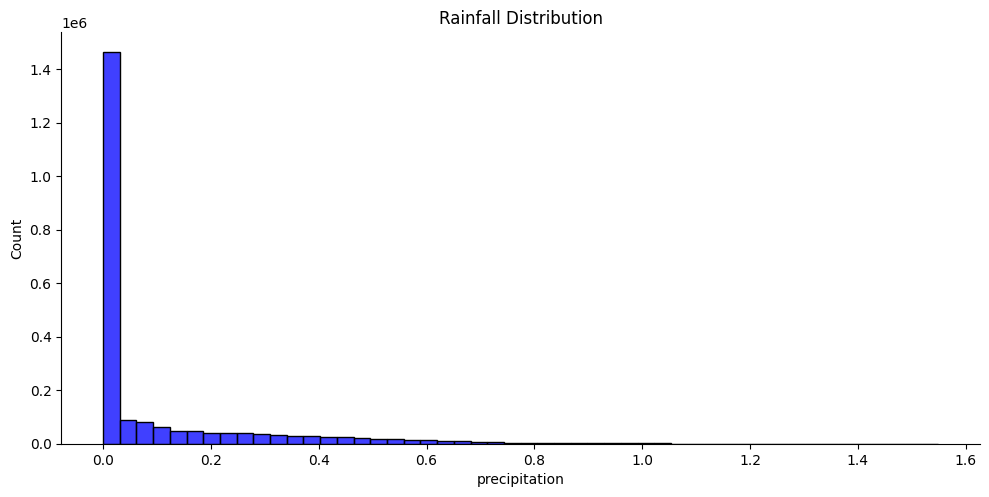

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(df, x='precipitation', height=5, aspect=2, bins=50, color='blue')
plt.title('Rainfall Distribution')

plt.show()

In [5]:
# the time variable is from 01-2010 to 12-2017
# add two variables: month and year

df['month'] = df['time'].dt.month
df['year'] = df['time'].dt.year
df

,time,lon,lat,latv,nv,lonv,precipitationQualityIndex,lat_bnds,precipitation,probabilityLiquidPrecipitation,time_bnds,lon_bnds,month,year
0,2010-01-01,68.549995,20.049999,0,0,0,2.21,20.000000,0.001,100.0,2010-01-01 00:00:00,68.499992,1,2010
1,2010-01-01,68.549995,20.049999,0,0,1,2.21,20.000000,0.001,100.0,2010-01-01 00:00:00,68.599998,1,2010
2,2010-01-01,68.549995,20.049999,0,1,0,2.21,20.000000,0.001,100.0,2010-02-01 00:00:00,68.499992,1,2010
3,2010-01-01,68.549995,20.049999,0,1,1,2.21,20.000000,0.001,100.0,2010-02-01 00:00:00,68.599998,1,2010
4,2010-01-01,68.549995,20.049999,1,0,0,2.21,20.099998,0.001,100.0,2010-01-01 00:00:00,68.499992,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225275,2017-12-01,74.549995,24.750000,0,1,1,12.19,24.700001,0.005,100.0,2018-01-01 00:00:00,74.599998,12,2017
2225276,2017-12-01,74.549995,24.750000,1,0,0,12.19,24.799999,0.005,100.0,2017-12-01 00:00:00,74.499992,12,2017
2225277,2017-12-01,74.549995,24.750000,1,0,1,12.19,24.799999,0.005,100.0,2017-12-01 00:00:00,74.599998,12,2017
2225278,2017-12-01,74.549995,24.750000,1,1,0,12.19,24.799999,0.005,100.0,2018-01-01 00:00:00,74.499992,12,2017


In [6]:
# mm/hr to mm/year
df['precipitation_cum_year'] = df['precipitation'] * 24 * 365
df

,time,lon,lat,latv,nv,lonv,precipitationQualityIndex,lat_bnds,precipitation,probabilityLiquidPrecipitation,time_bnds,lon_bnds,month,year,precipitation_cum_year
0,2010-01-01,68.549995,20.049999,0,0,0,2.21,20.000000,0.001,100.0,2010-01-01 00:00:00,68.499992,1,2010,8.760000
1,2010-01-01,68.549995,20.049999,0,0,1,2.21,20.000000,0.001,100.0,2010-01-01 00:00:00,68.599998,1,2010,8.760000
2,2010-01-01,68.549995,20.049999,0,1,0,2.21,20.000000,0.001,100.0,2010-02-01 00:00:00,68.499992,1,2010,8.760000
3,2010-01-01,68.549995,20.049999,0,1,1,2.21,20.000000,0.001,100.0,2010-02-01 00:00:00,68.599998,1,2010,8.760000
4,2010-01-01,68.549995,20.049999,1,0,0,2.21,20.099998,0.001,100.0,2010-01-01 00:00:00,68.499992,1,2010,8.760000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225275,2017-12-01,74.549995,24.750000,0,1,1,12.19,24.700001,0.005,100.0,2018-01-01 00:00:00,74.599998,12,2017,43.800003
2225276,2017-12-01,74.549995,24.750000,1,0,0,12.19,24.799999,0.005,100.0,2017-12-01 00:00:00,74.499992,12,2017,43.800003
2225277,2017-12-01,74.549995,24.750000,1,0,1,12.19,24.799999,0.005,100.0,2017-12-01 00:00:00,74.599998,12,2017,43.800003
2225278,2017-12-01,74.549995,24.750000,1,1,0,12.19,24.799999,0.005,100.0,2018-01-01 00:00:00,74.499992,12,2017,43.800003


In [10]:
# get max precipitation row
max_precipitation = df[df['precipitation'] == df['precipitation'].max()]
max_precipitation

,time,lon,lat,latv,nv,lonv,precipitationQualityIndex,lat_bnds,precipitation,probabilityLiquidPrecipitation,time_bnds,lon_bnds,month,year,precipitation_cum_year
1257600,2014-07-01,72.75,20.049999,0,0,0,7.68,20.000000,1.549,100.0,2014-07-01 00:00:00,72.699997,7,2014,13569.241211
1257601,2014-07-01,72.75,20.049999,0,0,1,7.68,20.000000,1.549,100.0,2014-07-01 00:00:00,72.800003,7,2014,13569.241211
1257602,2014-07-01,72.75,20.049999,0,1,0,7.68,20.000000,1.549,100.0,2014-08-01 00:00:00,72.699997,7,2014,13569.241211
1257603,2014-07-01,72.75,20.049999,0,1,1,7.68,20.000000,1.549,100.0,2014-08-01 00:00:00,72.800003,7,2014,13569.241211
1257604,2014-07-01,72.75,20.049999,1,0,0,7.68,20.099998,1.549,100.0,2014-07-01 00:00:00,72.699997,7,2014,13569.241211
1257605,2014-07-01,72.75,20.049999,1,0,1,7.68,20.099998,1.549,100.0,2014-07-01 00:00:00,72.800003,7,2014,13569.241211
1257606,2014-07-01,72.75,20.049999,1,1,0,7.68,20.099998,1.549,100.0,2014-08-01 00:00:00,72.699997,7,2014,13569.241211
1257607,2014-07-01,72.75,20.049999,1,1,1,7.68,20.099998,1.549,100.0,2014-08-01 00:00:00,72.800003,7,2014,13569.241211
